# Submitted by:
1. Brendan Lim (A0216513N)
2. Wong Cheuk Wah (A0280543H)
3. Laura Do (A0280548X)

# Library & Dataset Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Mon Jul 17 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53f0fbb42

In [ ]:
y.value_counts()

Diagnosis
B            357
M            212
dtype: int64

In [ ]:
#Combine X and y
df = pd.DataFrame()
df[list(X.columns)]= X
df['Diagnosis'] = np.where(y=='M', 1, 0)
df


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
df['Diagnosis'].value_counts() #imbalacned

0    357
1    212
Name: Diagnosis, dtype: int64

# Data Understanding & Feature Engineering

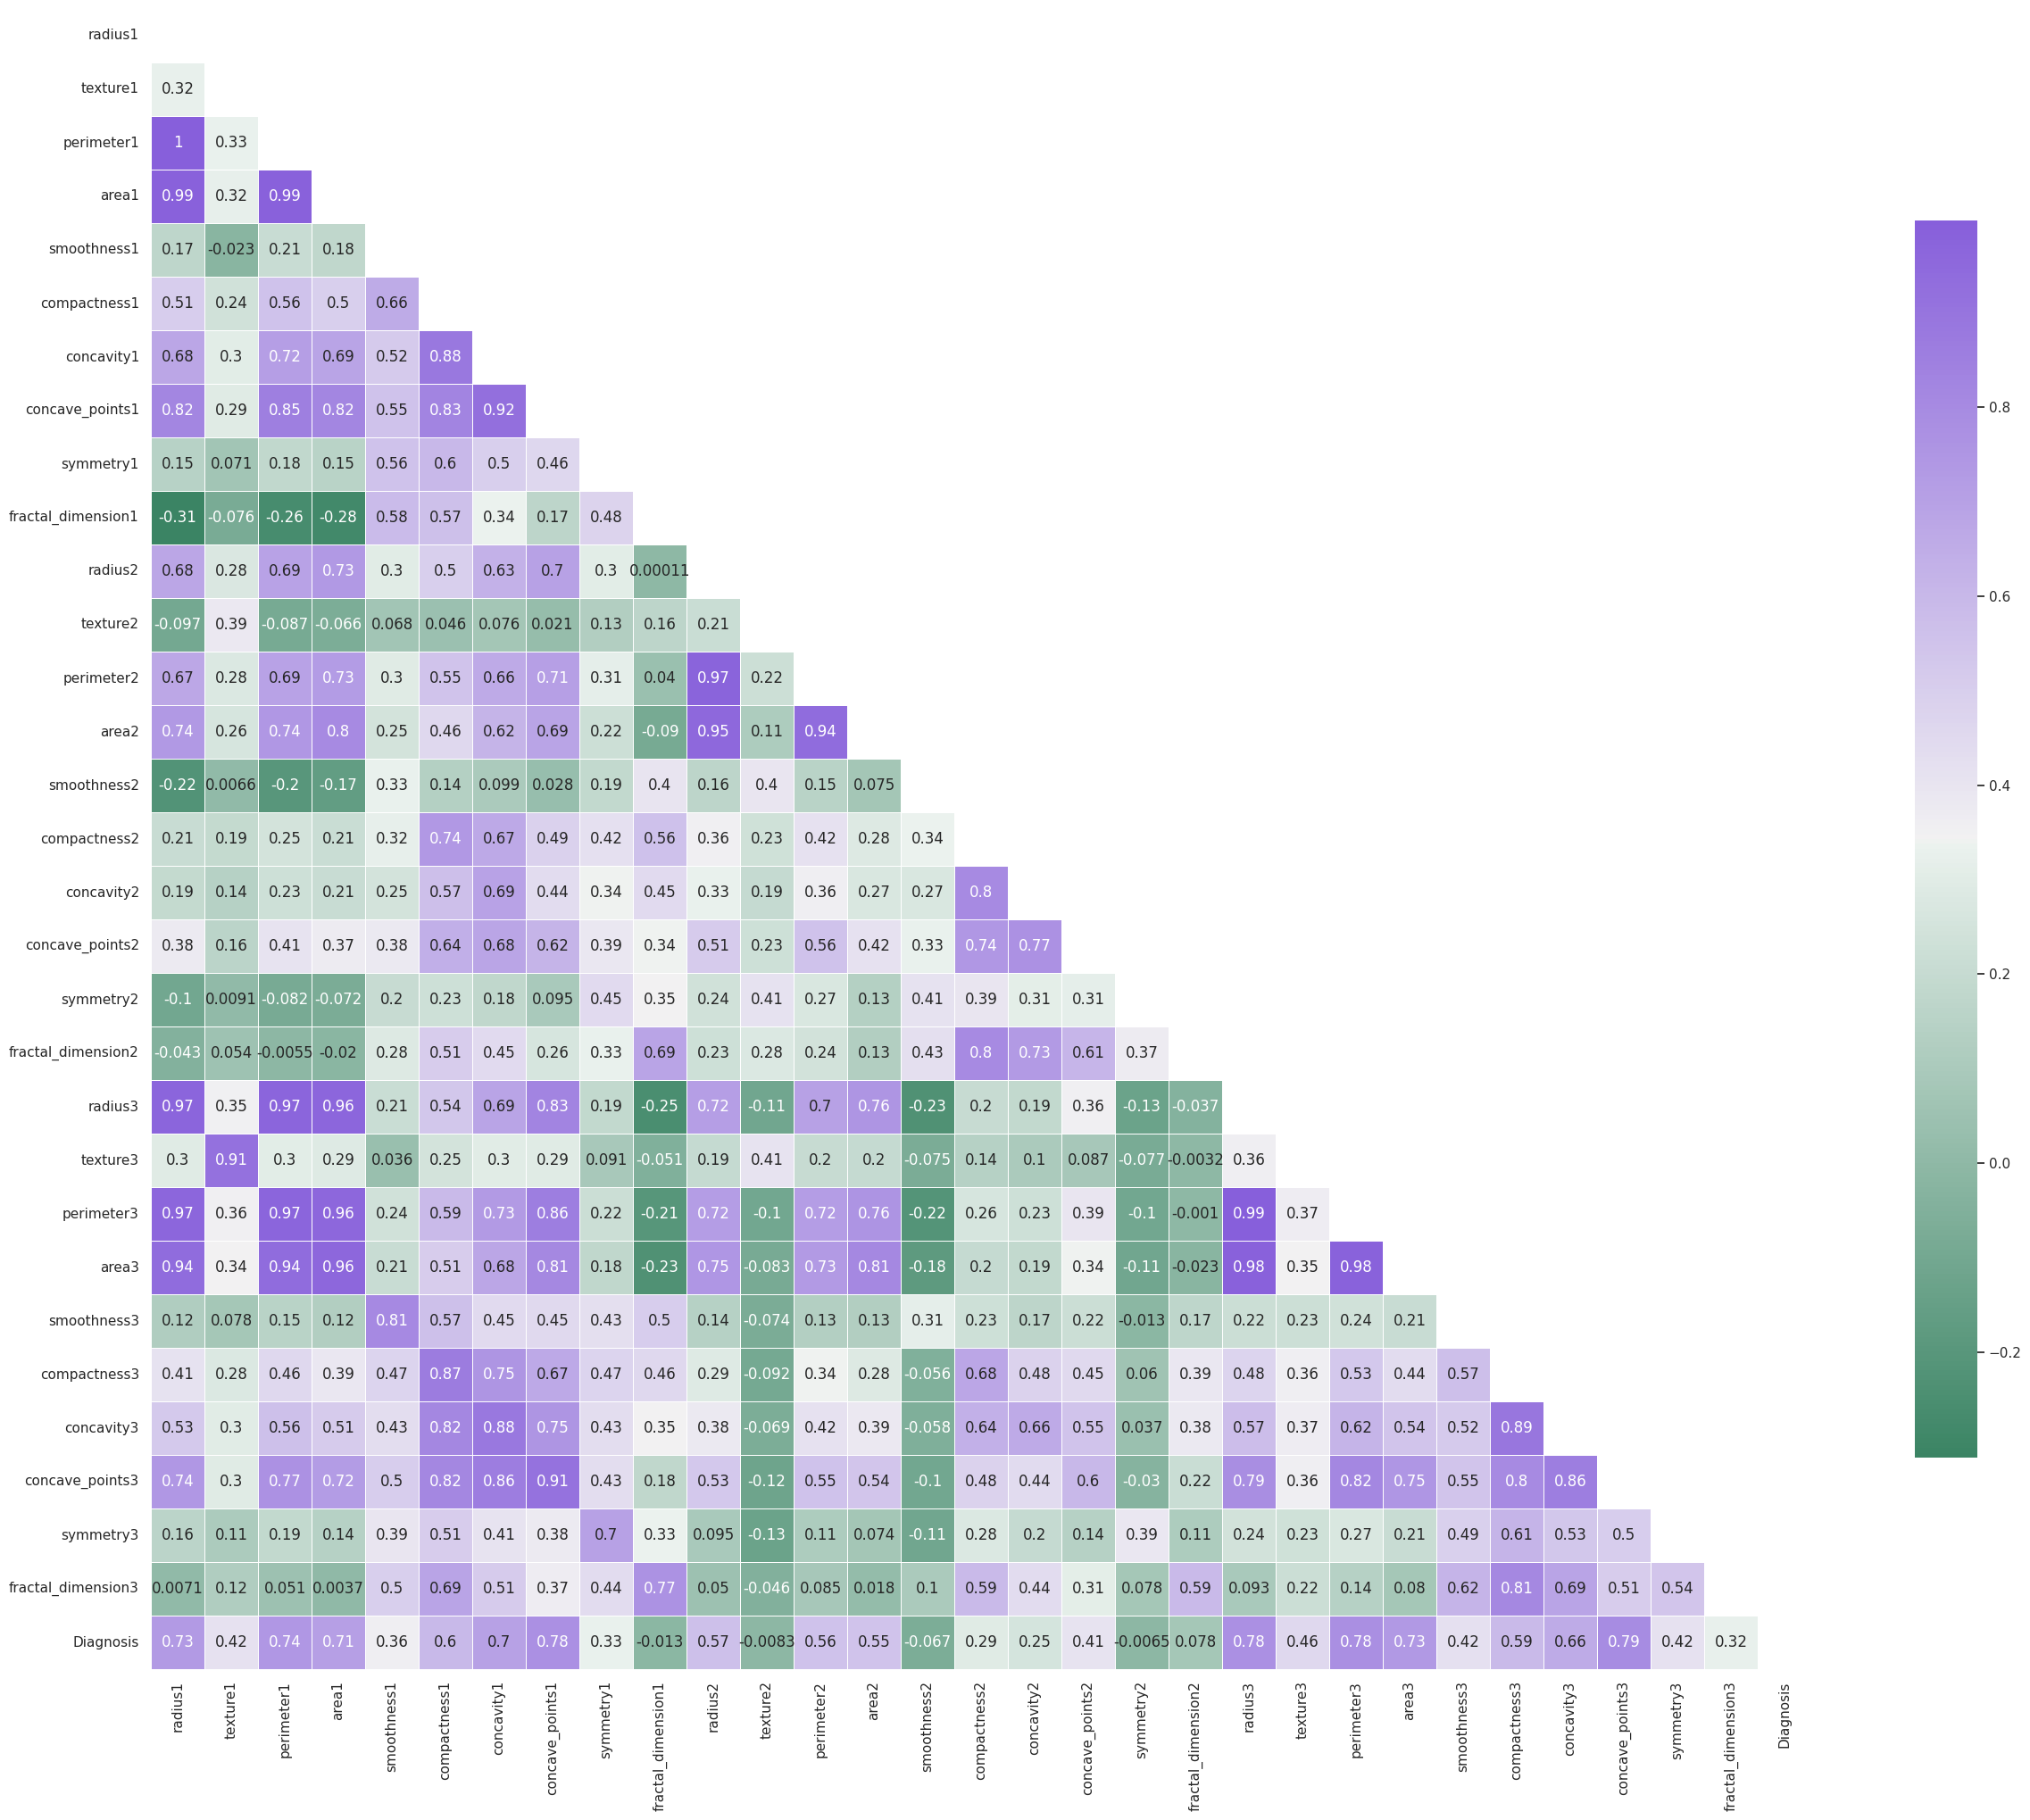

In [ ]:
# Correlation Analysis
sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True);

In [ ]:
corr_order = list(abs(df.corr()['Diagnosis']).sort_values(ascending = False).index)[1:]
corr_order

['concave_points3',
 'perimeter3',
 'concave_points1',
 'radius3',
 'perimeter1',
 'area3',
 'radius1',
 'area1',
 'concavity1',
 'concavity3',
 'compactness1',
 'compactness3',
 'radius2',
 'perimeter2',
 'area2',
 'texture3',
 'smoothness3',
 'symmetry3',
 'texture1',
 'concave_points2',
 'smoothness1',
 'symmetry1',
 'fractal_dimension3',
 'compactness2',
 'concavity2',
 'fractal_dimension2',
 'smoothness2',
 'fractal_dimension1',
 'texture2',
 'symmetry2']

In [ ]:
# Sort the columns of X according to the correlation strengths of features
X_sorted = df[corr_order]
y = df['Diagnosis']

In [ ]:
# Data Transformation

# standardizing the features in dataframe X to make sure all features are in the same scale
scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_sorted)

# creating a new dataframe with scaled features
X_scaled = pd.DataFrame(data=X_scaled_arr, columns=X_sorted.columns)

# concatenating the scaled features with the target variable y
#df_scaled['Binary Heart Disease']=y

X_scaled

,concave_points3,perimeter3,concave_points1,radius3,perimeter1,area3,radius1,area1,concavity1,concavity3,...,smoothness1,symmetry1,fractal_dimension3,compactness2,concavity2,fractal_dimension2,smoothness2,fractal_dimension1,texture2,symmetry2
0,2.296076,2.303601,2.532475,1.886690,1.269934,2.001237,1.097064,0.984375,2.652874,2.109526,...,1.568466,2.217515,1.937015,1.316862,0.724026,0.907083,-0.214002,2.255747,-0.565265,1.148757
1,1.087084,1.535126,0.548144,1.805927,1.685955,1.890489,1.829821,1.908708,-0.023846,-0.146749,...,-0.826962,0.001392,0.281190,-0.692926,-0.440780,-0.099444,-0.605351,-0.868652,-0.876244,-0.805450
2,1.955000,1.347475,2.037231,1.511870,1.566503,1.456285,1.579888,1.558884,1.363478,0.854974,...,0.942210,0.939685,0.201391,0.814974,0.213076,0.293559,-0.297005,-0.398008,-0.780083,0.237036
3,2.175786,-0.249939,1.451707,-0.281464,-0.592687,-0.550021,-0.768909,-0.764464,1.915897,1.989588,...,3.283553,2.867383,4.935010,2.744280,0.819518,2.047511,0.689702,4.910919,-0.110409,4.732680
4,0.729259,1.338539,1.428493,1.298575,1.776573,1.220724,1.750297,1.826229,1.371011,0.613179,...,0.280372,-0.009560,-0.397100,-0.048520,0.828471,0.499328,1.483067,-0.562450,-0.790244,-0.361092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.629151,1.752563,2.320965,1.901185,2.060786,2.015301,2.110995,2.343856,1.947285,0.664512,...,1.041842,-0.312589,-0.709091,0.191805,0.666001,0.167980,1.086384,-0.931027,0.071025,-1.138416
565,0.733827,1.421940,1.263669,1.536720,1.615931,1.494959,1.704854,1.723842,0.693043,0.236573,...,0.102458,-0.217664,-0.973978,-0.069758,0.252202,-0.490556,-0.424010,-1.058611,2.260938,-0.189161
566,0.414069,0.579001,0.105777,0.561361,0.672676,0.427906,0.702284,0.577953,0.046588,0.326767,...,-0.840484,-0.809117,-0.318409,0.661277,0.510827,0.036727,-0.379342,-0.895587,-0.257371,-0.891416
567,2.289985,2.303601,2.658866,1.961239,1.982524,1.653171,1.838341,1.735218,3.296944,3.197605,...,1.525767,2.137194,2.219635,2.017716,1.302285,0.904057,-0.173000,1.043695,0.686088,0.326634


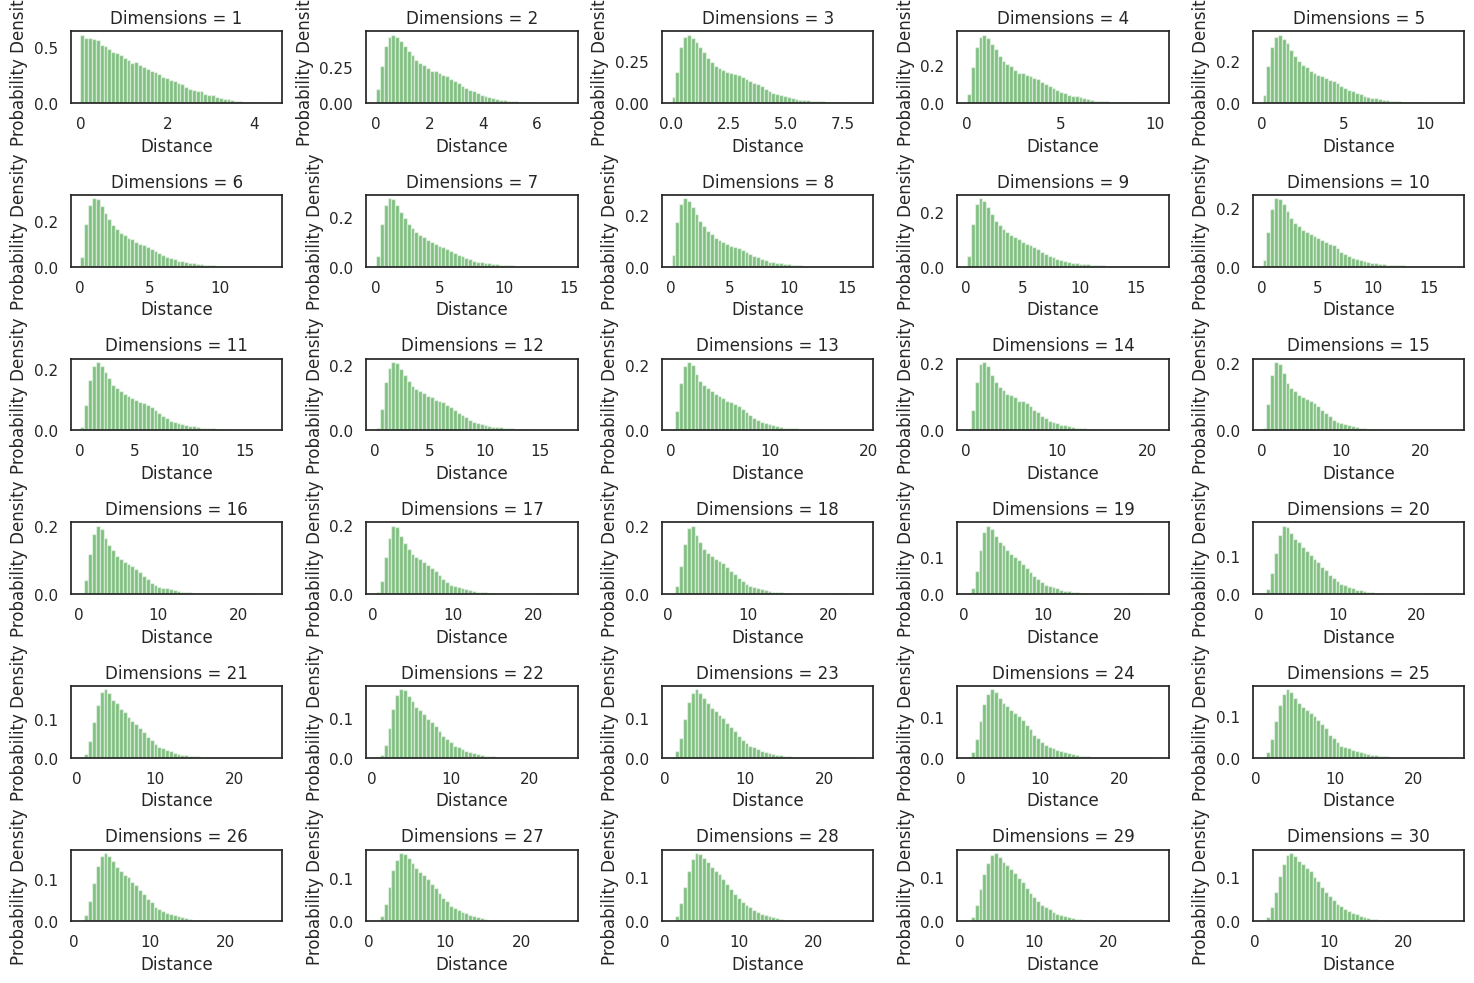

In [ ]:
max_dimensions = X_scaled.shape[1]
num_samples = X_scaled.shape[0]
num_bins = 50
from sklearn.metrics import pairwise_distances


# Calculate pairwise distances for each dimension from 1 to max_dimensions
distance_distributions = []
for dimensions in range(1, max_dimensions + 1):
    pairwise_distances_matrix = pairwise_distances(X_scaled.iloc[:, :dimensions], metric="euclidean")

    # Normalize distances between 0 and 1
    #scaler = MinMaxScaler() #can change to StandardScaler!
    # normalized_distances = scaler.fit_transform(pairwise_distances_matrix)
    #normalized_distances = pairwise_distances_matrix

    # Flatten the upper triangular part of the distance matrix to get a 1D array
    pairwise_distances_matrix = pairwise_distances_matrix[np.triu_indices(num_samples, k=1)]

    distance_distributions.append(pairwise_distances_matrix)

plt.figure(figsize=(15, 10))
for dimensions in range(1, max_dimensions + 1):
    plt.subplot(6, 5, dimensions)
    plt.hist(distance_ort pairwise_distances


# Calculate pairwise distances for each dimension from 1 to max_dimensions
distance_distributions = []
for dimensions in range(1, max_dimensions + 1):
    pairwise_distances_matrix = pairwise_distances(X_scaled.iloc[:, :dimensions], metric="euclidean")

    # Normalize distances between 0 and 1
    #scaler = MinMaxScaler() #can change to StandardScaler!
    # normalized_distances = scaler.fit_transform(pairwise_distances_matrix)
    #normalized_distances = pairwise_distances_matrix

    # Flatten the upper triangular part of the distance matrix to get a 1D array
    pairwise_distances_matrix = pairwise_distances_matrix[np.triu_indices(num_samples, k=1)]

    distance_distributions.append(pairwise_distances_matrix)

plt.figure(figsize=(15, 10))
for dimensions in range(1, max_dimensions + 1):
    plt.subplot(6, 5, dimensions)
    plt.hist(distance_distributions[dimensions - 1], bins=num_bins, density=True, alpha=0.5, color = "green")
    plt.title(f'Dimensions = {dimensions}')
    plt.xlabel('Distance')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

In [ ]:
len(distance_distributions[0])

161596

# Explore the Curse of Dimensionality

## Basline Model

In [ ]:
# Progressively add columns -> Find optimal K for each p -> Report Optimal Test Score

## Data Understandig
### Number of Samples
num_samples = X_scaled.shape[0]
### Number of dimensions
num_dim = X_scaled.shape[1]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Define the KNN model
knn = KNeighborsClassifier()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Create a pipeline for the KNN model
knn_pipe = Pipeline([('KNN', knn)])

# Parameter Grid
k_range = list(range(1, 24))
param_grid = {'KNN__n_neighbors': k_range}

# Initialize lists to store the best K and best score
best_k = []
best_score = []

# Loop over the numbers of dimensions (p)
for p in range(1, num_dim + 1):
    # For each p, perform a grid search over K values
    grid = GridSearchCV(knn_pipe,
                param_grid,
                scoring='recall',
                        cv=cv)
    grid_search = grid.fit(X_scaled.iloc[:, :p], y)

    # Record the best K value and score
    best_k.append(grid_search.best_params_['KNN__n_neighbors'])
    best_score.append(grid_search.best_score_)

# Create a DataFrame to display the results
p_list = list(range(1, num_dim + 1))
p_k_score = pd.DataFrame(list(zip(p_list, best_k, best_score)),
                         columns=['Number of Dimensions', 'Best K', 'Recall Score'])

# Display the DataFrame
print(p_k_score)


    Number of Dimensions  Best K  Recall Score
0                      1       1      0.854042
1                      2       1      0.900332
2                      3       5      0.905316
3                      4      13      0.914950
4                      5       3      0.933666
5                      6       3      0.938427
6                      7       3      0.933776
7                      8       3      0.929014
8                      9       3      0.929014
9                     10       5      0.929014
10                    11       3      0.919491
11                    12       3      0.919601
12                    13       3      0.900664
13                    14       3      0.895903
14                    15       3      0.905316
15                    16       1      0.938538
16                    17       1      0.966777
17                    18       1      0.952602
18                    19       3      0.938317
19                    20       1      0.938427
20           

In [ ]:
p_k_score

,Number of Dimensions,Best K,Recall Score
0,1,1,0.854042
1,2,1,0.900332
2,3,5,0.905316
3,4,13,0.914950
4,5,3,0.933666
5,6,3,0.938427
6,7,3,0.933776
7,8,3,0.929014
8,9,3,0.929014
9,10,5,0.929014


Text(0, 0.5, 'Recall')

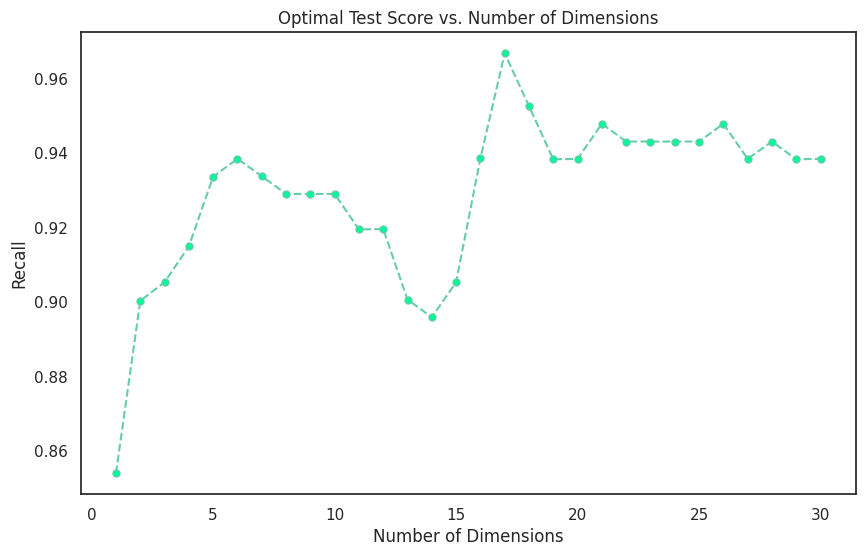

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(p_k_score['Number of Dimensions'], p_k_score['Recall Score'],color = 'mediumaquamarine',linestyle='dashed',
         marker='o',markerfacecolor='mediumspringgreen', markersize=5)
plt.title('Optimal Test Score vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Recall')

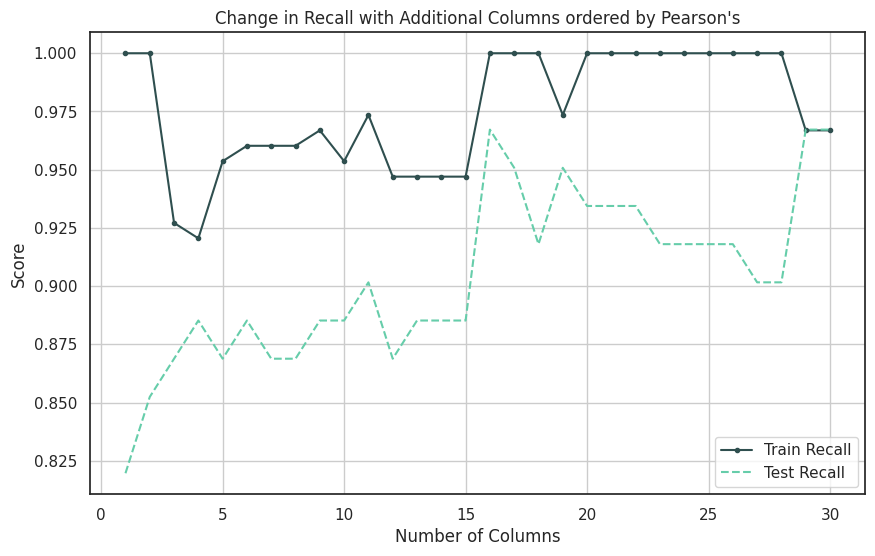

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state = 2023)
p = []

train_precision_scores = []
train_recall_scores = []
train_f1_scores = []
train_bal_acc_scores = []



precision_scores = []
recall_scores = []
f1_scores = []
bal_acc_scores = []

for i in range(len(p_k_score)):
  # (X_scaled.iloc[:, :p], y)
  p = p_k_score.loc[i, 'Number of Dimensions']
  k = p_k_score.loc[i, 'Best K']
  X_train, X_test, y_train, y_test = train_test_split(X_scaled.iloc[:, :p], y, test_size=0.3, random_state = 2023)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  y_pred = knn.predict(X_test)

  # Calculate TRAIN precision and recall and f1 and balanced accuracy
  precision = precision_score(y_train, y_train_pred)
  recall = recall_score(y_train, y_train_pred)
  f1 = f1_score(y_train, y_train_pred)
  balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

  # Append precision and recall scores to respective lists
  train_precision_scores.append(precision)
  train_recall_scores.append(recall)
  train_f1_scores.append(f1)
  train_bal_acc_scores.append(balanced_accuracy)

  # Calculate TEST precision and recall and f1 and balanced accuracy
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

  # Append precision and recall scores to respective lists
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)
  bal_acc_scores.append(balanced_accuracy)

# Plotting precision and recall scores
plt.figure(figsize=(10, 6))
# Train
#plt.plot(range(1, num_dim+1), train_precision_scores, marker='.', color = 'darkred', label='Train Precision')
plt.plot(range(1, num_dim+1), train_recall_scores, marker='.', color = 'darkslategray', label='Train Recall')
#plt.plot(range(1, num_dim+1), train_f1_scores, marker='.',  color = 'midnightblue', label='Train F1')
#plt.plot(range(1, num_dim+1), train_bal_acc_scores, marker='.', color = 'darkmagenta',  label='Train Balanced accuracy')
# Test
#plt.plot(range(1, num_dim+1), precision_scores, linestyle='dashed', color = 'lightcoral', label='Test Precision')
plt.plot(range(1, num_dim+1), recall_scores, linestyle='dashed',   color = 'mediumaquamarine',  label='Test Recall')
#plt.plot(range(1, num_dim+1), f1_scores, linestyle='dashed',   color = 'cornflowerblue', label='Test F1')
#plt.plot(range(1, num_dim+1), bal_acc_scores, linestyle='dashed',  color = 'violet',  label='Test Balanced accuracy')
plt.xlabel('Number of Columns')
plt.ylabel('Score')
plt.title('Change in Recall with Additional Columns ordered by Pearson\'s')
plt.legend()
plt.grid(True)
plt.show()



# How can we mitigate the curse of dimensionality?

## Method 1: Changing weights from uniform to distance

In [ ]:
#param_grid = {'KNN__n_neighbors': k_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__p':[1, 2]}


# Initialize lists to store the best K and best score
best_k = []
best_score = []

# Define the KNN model
knn = KNeighborsClassifier(weights = 'distance')
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Create a pipeline for the KNN model
knn_pipe = Pipeline([('KNN', knn)])

# Parameter Grid
k_range = list(range(1, 24))
param_grid = {'KNN__n_neighbors': k_range}



# Loop over the numbers of dimensions (p)
for p in range(1, num_dim + 1):
    # For each p, perform a grid search over K values
    grid = GridSearchCV(knn_pipe,
                param_grid,
                scoring='recall',  # You can use a single metric here
                        cv=cv)
    grid_search = grid.fit(X_scaled.iloc[:, :p], y)

    # Record the best K value and score
    best_k.append(grid_search.best_params_['KNN__n_neighbors'])
    best_score.append(grid_search.best_score_)

# Create a DataFrame to display the results
p_list = list(range(1, num_dim + 1))
p_k_score_weights = pd.DataFrame(list(zip(p_list, best_k, best_score)),
                         columns=['Number of Dimensions', 'Best K', 'Recall'])

# Display the DataFrame
print(p_k_score_weights)

    Number of Dimensions  Best K    Recall
0                      1       1  0.854042
1                      2       1  0.900332
2                      3       7  0.910078
3                      4       3  0.914950
4                      5       3  0.933666
5                      6       3  0.938427
6                      7       3  0.933776
7                      8       3  0.929014
8                      9       3  0.929014
9                     10       5  0.929014
10                    11       3  0.919491
11                    12       3  0.919601
12                    13       3  0.900664
13                    14       4  0.905205
14                    15       3  0.905316
15                    16       8  0.947841
16                    17       1  0.966777
17                    18       1  0.952602
18                    19       3  0.938317
19                    20       1  0.938427
20                    21       1  0.947841
21                    22       1  0.943079
22         

Text(0, 0.5, 'Recall')

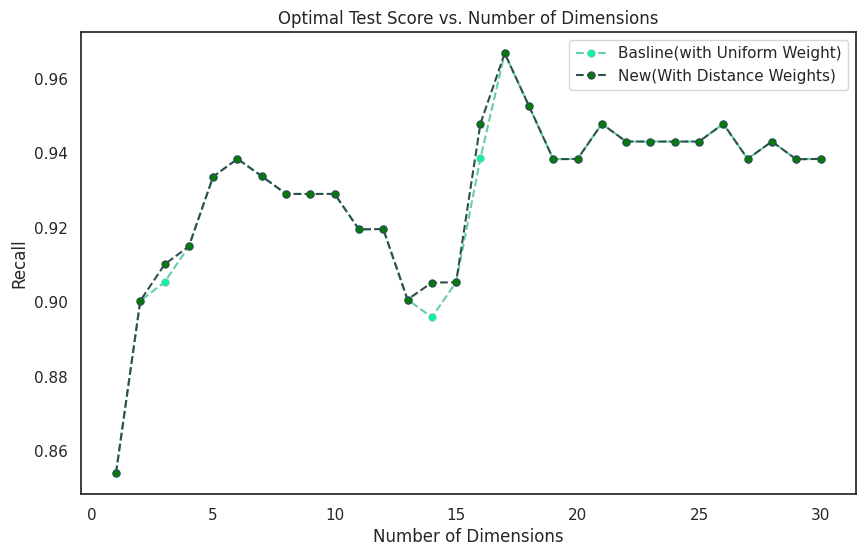

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(p_k_score['Number of Dimensions'], p_k_score['Recall Score'],color = 'mediumaquamarine',linestyle='dashed',
         marker='o',markerfacecolor='mediumspringgreen', markersize=5, label = 'Basline(with Uniform Weight)')
plt.plot(p_k_score_weights['Number of Dimensions'], p_k_score_weights['Recall'],color = 'darkslategray',linestyle='dashed',
         marker='o',markerfacecolor='green', markersize=5, label = 'New(With Distance Weights)')
plt.title('Optimal Test Score vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.legend()
plt.ylabel('Recall')

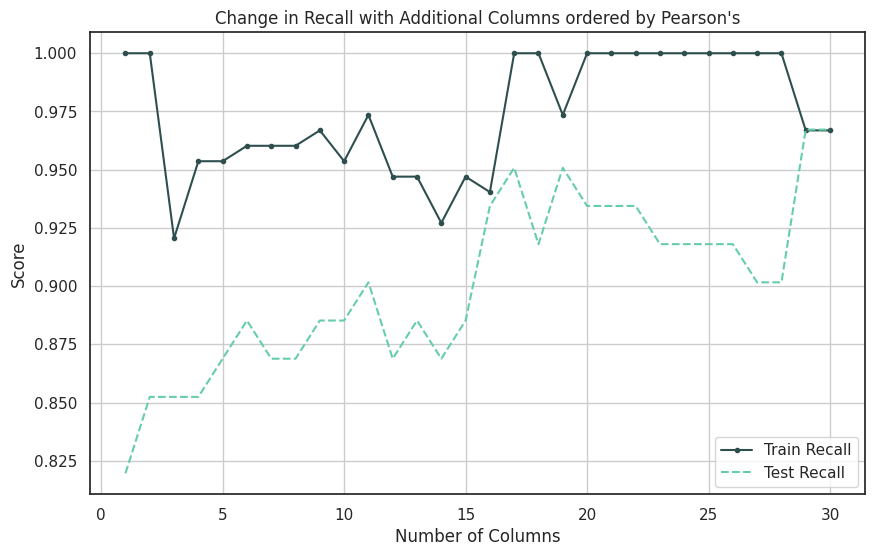

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state = 2023)
p = []

train_precision_scores = []
train_recall_scores = []
train_f1_scores = []
train_bal_acc_scores = []



precision_scores = []
recall_scores = []
f1_scores = []
bal_acc_scores = []

for i in range(len(p_k_score_weights)):
  # (X_scaled.iloc[:, :p], y)
  p = p_k_score_weights.loc[i, 'Number of Dimensions']
  k = p_k_score_weights.loc[i, 'Best K']
  X_train, X_test, y_train, y_test = train_test_split(X_scaled.iloc[:, :p], y, test_size=0.3, random_state = 2023)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  y_pred = knn.predict(X_test)

  # Calculate TRAIN precision and recall and f1 and balanced accuracy
  precision = precision_score(y_train, y_train_pred)
  recall = recall_score(y_train, y_train_pred)
  f1 = f1_score(y_train, y_train_pred)
  balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

  # Append precision and recall scores to respective lists
  train_precision_scores.append(precision)
  train_recall_scores.append(recall)
  train_f1_scores.append(f1)
  train_bal_acc_scores.append(balanced_accuracy)

  # Calculate TEST precision and recall and f1 and balanced accuracy
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

  # Append precision and recall scores to respective lists
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)
  bal_acc_scores.append(balanced_accuracy)

# Plotting precision and recall scores
plt.figure(figsize=(10, 6))
# Train
#plt.plot(range(1, num_dim+1), train_precision_scores, marker='.', color = 'darkred', label='Train Precision')
plt.plot(range(1, num_dim+1), train_recall_scores, marker='.', color = 'darkslategray', label='Train Recall')
#plt.plot(range(1, num_dim+1), train_f1_scores, marker='.',  color = 'midnightblue', label='Train F1')
#plt.plot(range(1, num_dim+1), train_bal_acc_scores, marker='.', color = 'darkmagenta',  label='Train Balanced accuracy')
# Test
#plt.plot(range(1, num_dim+1), precision_scores, linestyle='dashed', color = 'lightcoral', label='Test Precision')
plt.plot(range(1, num_dim+1), recall_scores, linestyle='dashed',   color = 'mediumaquamarine',  label='Test Recall')
#plt.plot(range(1, num_dim+1), f1_scores, linestyle='dashed',   color = 'cornflowerblue', label='Test F1')
#plt.plot(range(1, num_dim+1), bal_acc_scores, linestyle='dashed',  color = 'violet',  label='Test Balanced accuracy')
plt.xlabel('Number of Columns')
plt.ylabel('Score')
plt.title('Change in Recall with Additional Columns ordered by Pearson\'s')
plt.legend()
plt.grid(True)
plt.show()



## Method 2: Changing from Euclidean distance to Mantattan distance

In [ ]:
#param_grid = {'KNN__n_neighbors': k_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__p':[1, 2]}


# Initialize lists to store the best K and best score
best_k = []
best_score = []

# Define the KNN model
knn = KNeighborsClassifier(p = 1) #Change to manhattan_distance

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Create a pipeline for the KNN model
knn_pipe = Pipeline([('KNN', knn)])

# Parameter Grid
k_range = list(range(1, 24))
param_grid = {'KNN__n_neighbors': k_range}



# Loop over the numbers of dimensions (p)
for p in range(1, num_dim + 1):
    # For each p, perform a grid search over K values
    grid = GridSearchCV(knn_pipe,
                param_grid,
                scoring='recall',  # You can use a single metric here
                        cv=cv)
    grid_search = grid.fit(X_scaled.iloc[:, :p], y)

    # Record the best K value and score
    best_k.append(grid_search.best_params_['KNN__n_neighbors'])
    best_score.append(grid_search.best_score_)

# Create a DataFrame to display the results
p_list = list(range(1, num_dim + 1))
p_k_score_m = pd.DataFrame(list(zip(p_list, best_k, best_score)),
                         columns=['Number of Dimensions', 'Best K', 'Recall'])

# Display the DataFrame
print(p_k_score)

    Number of Dimensions  Best K  Recall Score
0                      1       1      0.854042
1                      2       1      0.900332
2                      3       5      0.905316
3                      4      13      0.914950
4                      5       3      0.933666
5                      6       3      0.938427
6                      7       3      0.933776
7                      8       3      0.929014
8                      9       3      0.929014
9                     10       5      0.929014
10                    11       3      0.919491
11                    12       3      0.919601
12                    13       3      0.900664
13                    14       3      0.895903
14                    15       3      0.905316
15                    16       1      0.938538
16                    17       1      0.966777
17                    18       1      0.952602
18                    19       3      0.938317
19                    20       1      0.938427
20           

Text(0, 0.5, 'Recall')

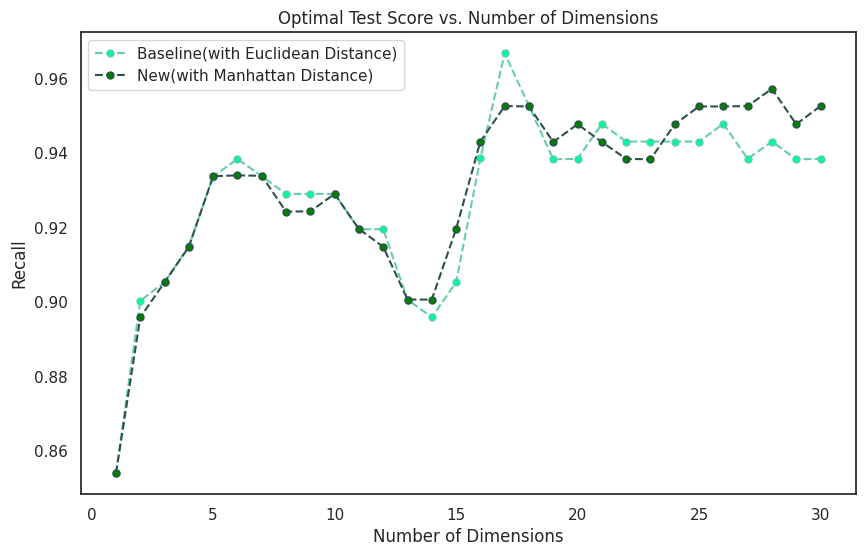

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(p_k_score['Number of Dimensions'], p_k_score['Recall Score'],color = 'mediumaquamarine',linestyle='dashed',
         marker='o',markerfacecolor='mediumspringgreen', markersize=5, label = 'Baseline(with Euclidean Distance)')
plt.plot(p_k_score_m['Number of Dimensions'], p_k_score_m['Recall'],color = 'darkslategray',linestyle='dashed',
         marker='o',markerfacecolor='green', markersize=5, label = 'New(with Manhattan Distance)')
plt.title('Optimal Test Score vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.legend()
plt.ylabel('Recall')

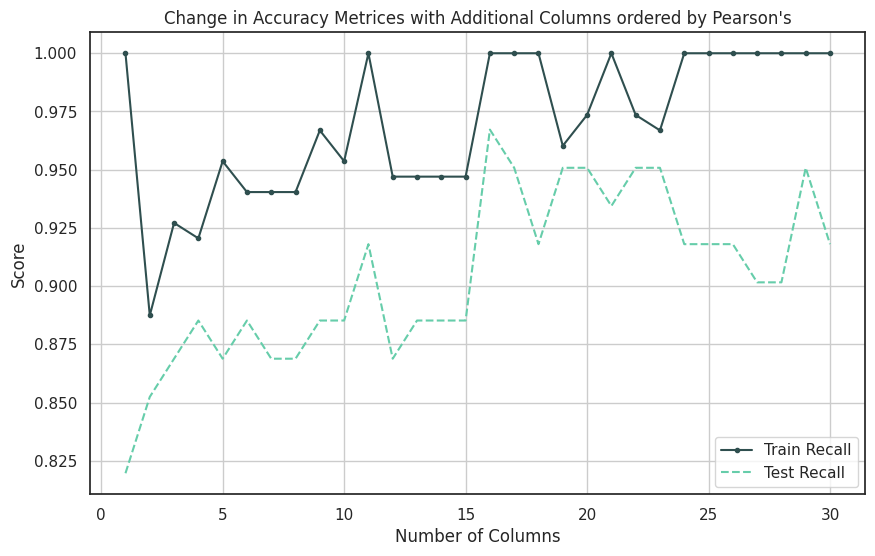

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state = 2023)
p = []

train_precision_scores = []
train_recall_scores = []
train_f1_scores = []
train_bal_acc_scores = []



precision_scores = []
recall_scores = []
f1_scores = []
bal_acc_scores = []

for i in range(len(p_k_score_m)):
  # (X_scaled.iloc[:, :p], y)
  p = p_k_score_m.loc[i, 'Number of Dimensions']
  k = p_k_score_m.loc[i, 'Best K']
  X_train, X_test, y_train, y_test = train_test_split(X_scaled.iloc[:, :p], y, test_size=0.3, random_state = 2023)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  y_pred = knn.predict(X_test)

  # Calculate TRAIN precision and recall and f1 and balanced accuracy
  precision = precision_score(y_train, y_train_pred)
  recall = recall_score(y_train, y_train_pred)
  f1 = f1_score(y_train, y_train_pred)
  balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

  # Append precision and recall scores to respective lists
  train_precision_scores.append(precision)
  train_recall_scores.append(recall)
  train_f1_scores.append(f1)
  train_bal_acc_scores.append(balanced_accuracy)

  # Calculate TEST precision and recall and f1 and balanced accuracy
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

  # Append precision and recall scores to respective lists
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)
  bal_acc_scores.append(balanced_accuracy)

# Plotting precision and recall scores
plt.figure(figsize=(10, 6))
# Train
#plt.plot(range(1, num_dim+1), train_precision_scores, marker='.', color = 'darkred', label='Train Precision')
plt.plot(range(1, num_dim+1), train_recall_scores, marker='.', color = 'darkslategray', label='Train Recall')
#plt.plot(range(1, num_dim+1), train_f1_scores, marker='.',  color = 'midnightblue', label='Train F1')
#plt.plot(range(1, num_dim+1), train_bal_acc_scores, marker='.', color = 'darkmagenta',  label='Train Balanced accuracy')
# Test
#plt.plot(range(1, num_dim+1), precision_scores, linestyle='dashed', color = 'lightcoral', label='Test Precision')
plt.plot(range(1, num_dim+1), recall_scores, linestyle='dashed',   color = 'mediumaquamarine',  label='Test Recall')
#plt.plot(range(1, num_dim+1), f1_scores, linestyle='dashed',   color = 'cornflowerblue', label='Test F1')
#plt.plot(range(1, num_dim+1), bal_acc_scores, linestyle='dashed',  color = 'violet',  label='Test Balanced accuracy')
plt.xlabel('Number of Columns')
plt.ylabel('Score')
plt.title('Change in Accuracy Metrices with Additional Columns ordered by Pearson\'s')
plt.legend()
plt.grid(True)
plt.show()



## Method 3: Rearrange the order of features with Recursive Feature Elimination

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)

# Initialize RFE with the model (no need to specify the number of features here)
rfe = RFE(estimator=model)

# Fit RFE to X and y, and set the number of features to select
n_features_to_select = 1  # Change this number if you want to select a different number of features
rfe.fit(X_scaled, y)
rfe.n_features_to_select = n_features_to_select

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Create a dictionary to store feature importance
feature_importance = {}

# Loop through each feature and its ranking, store in the dictionary
for feature, rank in zip(X.columns, feature_ranking):
    feature_importance[feature] = rank

# Print out ordered feature importance keys and values
sorted_feature_importance = sorted(feature_importance, key=feature_importance.get)
print("Ordered Feature Importance:")
for feature in sorted_feature_importance:
    print(f"{feature}: {feature_importance[feature]}")


Ordered Feature Importance:
radius1: 1
texture1: 1
perimeter1: 1
area1: 1
compactness1: 1
concave_points1: 1
fractal_dimension1: 1
radius2: 1
perimeter2: 1
area2: 1
smoothness2: 1
compactness2: 1
concavity2: 1
concave_points2: 1
area3: 1
concavity1: 2
symmetry1: 3
symmetry2: 4
smoothness1: 5
compactness3: 6
fractal_dimension2: 7
perimeter3: 8
concave_points3: 9
fractal_dimension3: 10
concavity3: 11
symmetry3: 12
radius3: 13
smoothness3: 14
texture3: 15
texture2: 16


In [ ]:
len(sorted_feature_importance)

30

In [ ]:
corr_order

['concave_points3',
 'perimeter3',
 'concave_points1',
 'radius3',
 'perimeter1',
 'area3',
 'radius1',
 'area1',
 'concavity1',
 'concavity3',
 'compactness1',
 'compactness3',
 'radius2',
 'perimeter2',
 'area2',
 'texture3',
 'smoothness3',
 'symmetry3',
 'texture1',
 'concave_points2',
 'smoothness1',
 'symmetry1',
 'fractal_dimension3',
 'compactness2',
 'concavity2',
 'fractal_dimension2',
 'smoothness2',
 'fractal_dimension1',
 'texture2',
 'symmetry2']

In [ ]:
X_scaled_rfe = X_scaled[sorted_feature_importance]
X_scaled_rfe

,radius1,texture1,perimeter1,area1,compactness1,concave_points1,fractal_dimension1,radius2,perimeter2,area2,...,fractal_dimension2,perimeter3,concave_points3,fractal_dimension3,concavity3,symmetry3,radius3,smoothness3,texture3,texture2
0,1.097064,-2.073335,1.269934,0.984375,3.283515,2.532475,2.255747,2.489734,2.833031,2.487578,...,0.907083,2.303601,2.296076,1.937015,2.109526,2.750622,1.886690,1.307686,-1.359293,-0.565265
1,1.829821,-0.353632,1.685955,1.908708,-0.487072,0.548144,-0.868652,0.499255,0.263327,0.742402,...,-0.099444,1.535126,1.087084,0.281190,-0.146749,-0.243890,1.805927,-0.375612,-0.369203,-0.876244
2,1.579888,0.456187,1.566503,1.558884,1.052926,2.037231,-0.398008,1.228676,0.850928,1.181336,...,0.293559,1.347475,1.955000,0.201391,0.854974,1.152255,1.511870,0.527407,-0.023974,-0.780083
3,-0.768909,0.253732,-0.592687,-0.764464,3.402909,1.451707,4.910919,0.326373,0.286593,-0.288378,...,2.047511,-0.249939,2.175786,4.935010,1.989588,6.046041,-0.281464,3.394275,0.133984,-0.110409
4,1.750297,-1.151816,1.776573,1.826229,0.539340,1.428493,-0.562450,1.270543,1.273189,1.190357,...,0.499328,1.338539,0.729259,-0.397100,0.613179,-0.868353,1.298575,0.220556,-1.466770,-0.790244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,0.219060,2.320965,-0.931027,2.782080,2.379583,2.604187,...,0.167980,1.752563,1.629151,-0.709091,0.664512,-1.360158,1.901185,0.378365,0.117700,0.071025
565,1.704854,2.085134,1.615931,1.723842,-0.017833,1.263669,-1.058611,1.300499,1.156857,1.291565,...,-0.490556,1.421940,0.733827,-0.973978,0.236573,-0.531855,1.536720,-0.691230,2.047399,2.260938
566,0.702284,2.045574,0.672676,0.577953,-0.038680,0.105777,-0.895587,0.184892,0.276693,0.180698,...,0.036727,0.579001,0.414069,-0.318409,0.326767,-1.104549,0.561361,-0.809587,1.374854,-0.257371
567,1.838341,2.336457,1.982524,1.735218,3.272144,2.658866,1.043695,1.157935,1.438530,1.009503,...,0.904057,2.303601,2.289985,2.219635,3.197605,1.919083,1.961239,1.430427,2.237926,0.686088


In [ ]:
# Initialize lists to store the best K and best score
best_k = []
best_score = []

# Loop over the numbers of dimensions (p)
for p in range(1, num_dim + 1):
    # For each p, perform a grid search over K values
    grid = GridSearchCV(knn_pipe,
                param_grid,
                scoring='recall',  # You can use a single metric here
                        cv=cv)
    grid_search = grid.fit(X_scaled_rfe.iloc[:, :p], y)

    # Record the best K value and score
    best_k.append(grid_search.best_params_['KNN__n_neighbors'])
    best_score.append(grid_search.best_score_)

# Create a DataFrame to display the results
p_list = list(range(1, num_dim + 1))
p_k_score_importance = pd.DataFrame(list(zip(p_list, best_k, best_score)),
                         columns=['Number of Dimensions', 'Best K', 'Recall Score'])

# Display the DataFrame
print(p_k_score_importance)

    Number of Dimensions  Best K  Recall Score
0                      1       1      0.778073
1                      2       1      0.820487
2                      3      23      0.853378
3                      4       1      0.848726
4                      5       5      0.872425
5                      6      11      0.891030
6                      7       1      0.905426
7                      8       7      0.891141
8                      9       7      0.891141
9                     10      11      0.891030
10                    11       3      0.905426
11                    12       1      0.900664
12                    13       3      0.919491
13                    14       3      0.919380
14                    15       5      0.919491
15                    16       1      0.929014
16                    17       1      0.943300
17                    18       1      0.938538
18                    19       1      0.943189
19                    20       1      0.943189
20           

Text(0, 0.5, 'Recall')

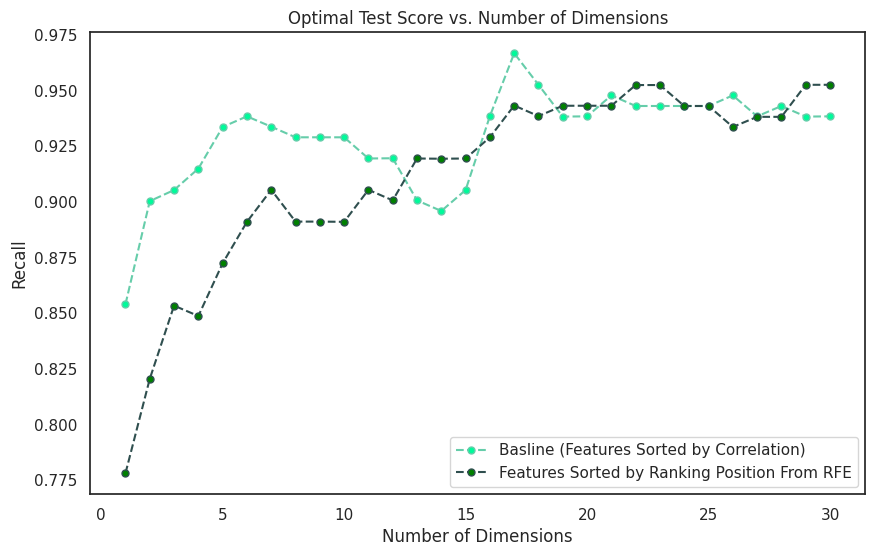

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(p_k_score['Number of Dimensions'], p_k_score['Recall Score'],color = 'mediumaquamarine',linestyle='dashed',
         marker='o',markerfacecolor='mediumspringgreen', markersize=5, label = 'Basline (Features Sorted by Correlation)')
plt.plot(p_k_score_importance['Number of Dimensions'], p_k_score_importance['Recall Score'],color = 'darkslategray',linestyle='dashed',
         marker='o',markerfacecolor='green', markersize=5, label = 'Features Sorted by Ranking Position From RFE')
plt.title('Optimal Test Score vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.legend()
plt.ylabel('Recall')